In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 95, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-01 1998-03-01 ... 2005-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980201 19980301 19980401 ... 20051101 20051201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [8]:
#interpolating to new lat and lon

#new_lon = np.arange(86,94,0.2007)
#new_lat = np.arange(18,28,0.034)
#jjas_data = jjas_data.interp(lat=new_lat,lon=new_lon)
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.36424097, 0.37230343, 0.37556937, ..., 0.9275374 , 0.8777441 ,
        0.7401172 ],
       [0.3488904 , 0.3580809 , 0.37171277, ..., 0.8381174 , 0.8546289 ,
        0.7661515 ],
       [0.35725656, 0.38105756, 0.38026428, ..., 0.7783064 , 0.7250169 ,
        0.7301341 ],
       ...,
       [0.30676398, 0.28645703, 0.2692595 , ..., 0.3147538 , 0.3260526 ,
        0.37545067],
       [0.31019294, 0.28211737, 0.25408417, ..., 0.2937004 , 0.295968  ,
        0.31669715],
       [0.27611408, 0.25033024, 0.2144223 , ..., 0.30539277, 0.3226247 ,
        0.3085496 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean*24
 


trmm = pr_mm

In [11]:
#opening the noresm data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/NorESM1-M/noresm1_remap.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:05:10 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [12]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_29207/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1970-01-01 00:00:00 ... 2006-01-01 00:00:00
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:05:10 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [13]:
#data.lat.values

In [14]:
#to select the year from 1980 to 2015
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 95, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2005-11-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-01-01 00:00:00 ... 2005-12-01 00:00:00
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:05:10 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [15]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-06-01 00:00:00 ... 2005-10-01 00:00:00
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:05:10 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [16]:
#jjas_data.x.values
#jjas_data.lon.values


In [17]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[2.8762943e-05, 2.8464339e-05, 3.0794246e-05, ..., 6.9784284e-05,
        7.6980410e-05, 9.4289404e-05],
       [2.7636936e-05, 2.8457882e-05, 2.9088866e-05, ..., 7.3735784e-05,
        8.7867535e-05, 9.8345205e-05],
       [2.6627135e-05, 2.7850470e-05, 2.8412051e-05, ..., 7.7518453e-05,
        9.9341531e-05, 1.1133800e-04],
       ...,
       [1.7365685e-04, 1.9437198e-04, 2.1445446e-04, ..., 2.1362111e-04,
        2.4107521e-04, 1.9385196e-04],
       [1.9834371e-04, 2.1861590e-04, 2.7803390e-04, ..., 1.8474228e-04,
        2.4710110e-04, 2.6863860e-04],
       [2.0032108e-04, 3.1719045e-04, 5.3115201e-04, ..., 1.7659400e-04,
        2.5860599e-04, 3.1809535e-04]], dtype=float32)
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [18]:
noresm = jjas_mean*86400
noresm

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 2.48511825,  2.45931891,  2.66062289, ...,  6.02936216,
         6.65110743,  8.1466045 ],
       [ 2.38783123,  2.45876099,  2.51327799, ...,  6.37077175,
         7.59175499,  8.49702568],
       [ 2.30058442,  2.40628064,  2.45480117, ...,  6.6975943 ,
         8.58310824,  9.61960307],
       ...,
       [15.00395201, 16.79373938, 18.528865  , ..., 18.45686403,
        20.82889779, 16.74880902],
       [17.13689659, 18.88841344, 24.02212881, ..., 15.96173323,
        21.34953467, 23.21037501],
       [17.30774157, 27.40525519, 45.89153342, ..., 15.25772125,
        22.34355714, 27.48343823]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
bias = noresm - trmm
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[ -6.25666489,  -6.47596284,  -6.35304231, ..., -16.23153452,
        -14.4147495 ,  -9.61620907],
       [ -5.98553798,  -6.1351807 ,  -6.40782835, ..., -13.74404683,
        -12.91933815,  -9.89061051],
       [ -6.27357329,  -6.73910129,  -6.6715416 , ..., -11.98175941,
         -8.81729764,  -7.90361699],
       ...,
       [  7.64161681,   9.91877085,  12.0666367 , ...,  10.90277258,
         13.00363524,   7.73799245],
       [  9.69226597,  12.11759664,  17.92410873, ...,   8.9129237 ,
         14.24630276,  15.60964316],
       [ 10.68100397,  21.39732921,  40.74539809, ...,   7.92829449,
         14.60056379,  20.07824777]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [20]:
bias_percentage = ((noresm - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[-71.57195262, -72.47631378, -70.48234174, ..., -72.91500766,
        -68.42707395, -54.1367449 ],
       [-71.48302947, -71.38960117, -71.82773195, ..., -68.32796814,
        -62.98707759, -53.78946161],
       [-73.16839161, -73.68857137, -73.10202748, ..., -64.14440024,
        -50.67294234, -45.10367935],
       ...,
       [103.7933834 , 144.27369095, 186.72563307, ..., 144.32936965,
        166.17506648,  85.87448635],
       [130.19136148, 178.96801804, 293.93325216, ..., 126.44580143,
        200.56085669, 205.37026526],
       [161.18042733, 356.15167785, 791.76693722, ..., 108.17073071,
        188.56484977, 271.13749274]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

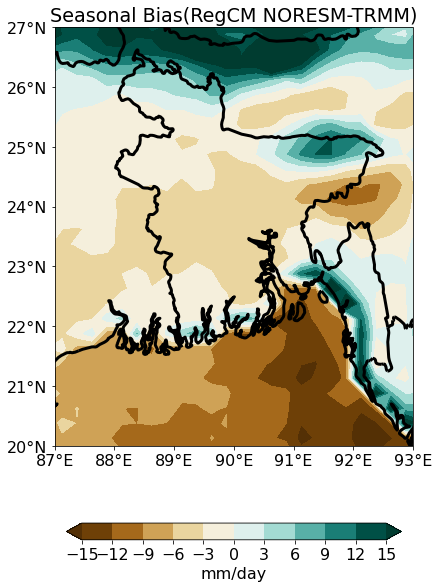

In [21]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                 levels=np.arange(-15,15+3,3), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(RegCM NORESM-TRMM)' )
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(noresm-trmm).png")



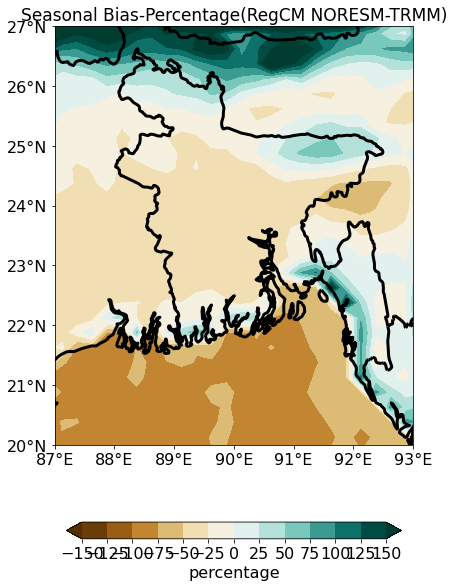

In [27]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                 levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(RegCM NORESM-TRMM)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(noresm-trmm).png")







In [23]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r